<h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesores: Ricardo Ñanculef y Francisco Mena</h2>
    <h2 align="center">Ayudantes </h2>
    <h2 align="center">Jorge Ludueña | Axel Reyes </h2>
    <h3 align="center">jorge.luduena@sansano.usm.cl | axel.reyes@sansano.usm.cl</h3>  
    <h3 align="center">Isidora Ubilla ;  201804581-0</h3>
    <h3 align="center">2021-1</h3>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Bootstrap 

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

En esta sección trabajará con una muestra de una población $N\sim (50,20^2)$ muestra.csv

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

1. Utilice la media muestral y varianza muestral como estimadores de $\mu$ y $\sigma^2$ respectivamente.
2. Utilice el método de remuestreo Bootstrap para obtener B valores estimados de $\mu$ y B valores estimados de $\sigma^2$. Escoja valores razonables para B, un valor sugerido estaria cerca de los 1000, asegúrese de útilizar un valor que permita la ejecución en un tiempo corto.
3. Grafique un histograma de los B valores de $\mu$ y otro histograma de los B valores de $\sigma^2$ obtenidos en el punto anterior. Concluya respecto a lo que observa.
4. A partir del punto 2, obtenga aproximaciones al valor esperado de ambos estimadores y compárelos con los parámetros reales de la distribución original de los datos.
5. A partir del punto 2, obtenga aproximaciones a la varianza de ambos estimadores y compárelos entre sí. Además, responda ¿concuerdan los resultados con los gráficos realizados en el punto 3?


In [ ]:
data = pd.read_csv('muestra.csv')

print("Pregunta 1")

mu_ = np.mean(data["valor"])
print("Estimador mu: ", mu_)


var_ = np.var(data["valor"])  
print("Estimador de sigma^2: ",var_)

Pregunta 1
Estimador mu:  47.50880927550733
Estimador de sigma^2:  375.99512435084944


In [ ]:
print("Pregunta 2")

B = 10000
mu = []
sigma = []

for i in range(B):
    arreglo = []
    for i in range(len(data.index)):
        random = np.random.randint(len(data.index))
        arreglo.append(data["valor"][random])
    m = np.mean(arreglo)
    s = np.var(arreglo)
    mu.append(m)
    sigma.append(s)

print(sigma)
print(mu)

Pregunta 2
[425.3140149614035, 346.9420781227352, 377.42867432927216, 435.18379179773314, 280.225330695359, 358.0720663126953, 376.621070235575, 300.0786143111314, 373.45696153346006, 403.24120918508817, 288.90295388751053, 343.69825385507266, 317.35273609787896, 370.5372435830111, 415.2132514430604, 359.16946772628523, 339.50867663884384, 412.26530675640373, 302.0441389658576, 357.5546325271121, 394.6067935791587, 289.58631832717003, 374.6283639153465, 356.1574248269607, 309.48316832143314, 298.6842854140686, 369.24828595778666, 413.4796719841171, 363.1144573003254, 466.28891175607527, 316.9469200458363, 406.72151507192683, 505.9249476878985, 417.6515795949821, 385.17058791374103, 474.744016105945, 410.0466214374361, 348.45622559403085, 322.9485099104138, 367.46368284441417, 338.2953386590824, 359.60267355319576, 440.321301071657, 379.92007558096293, 426.17635448955787, 287.1668534291229, 368.9765442330928, 365.33167041699227, 380.9253566201652, 391.0707664000004, 363.898553619282, 50

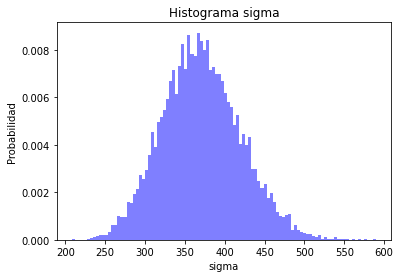

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(sigma, density=True, bins=100, facecolor='blue', alpha=0.5)
ax.set_title("Histograma sigma")
ax.set_xlabel('sigma')
ax.set_ylabel('Probabilidad')
plt.show()


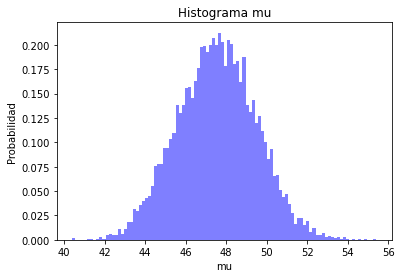

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(mu, density=True, bins= 100, facecolor='blue', alpha=0.5)
ax.set_title("Histograma mu")
ax.set_xlabel('mu')
ax.set_ylabel('Probabilidad')
plt.show()

In [ ]:
print("Pregunta 4")


mu_esperado = np.mean(mu)
print("valor esperado del estimador mu: ", mu_esperado)
print("El valor original de mu según distribución es: ", mu_)

varianza_esperado = np.mean(sigma)
print("El valor esperado del estimador sigma: ",  varianza_esperado)
print("El valor original de sigma según distribución es: ", var_)


Pregunta 4
valor esperado del estimador mu:  47.5289548988494
El valor original de mu según distribución es:  47.50880927550733
El valor esperado del estimador sigma:  370.7238308005092
El valor original de sigma según distribución es:  375.99512435084944


In [ ]:
print("Pregunta 5")


var_prom = np.var(mu) 
print("La Varianza del estimador mu: ", var_prom )
print("Desv de la varianza del estimador mu",np.sqrt(var_prom))
print("")
var_var = np.var(sigma)
print("La Varianza del estimador sigma: ",var_var)
print("Desv de la varianza del estimador sigma",np.sqrt(var_var))

Pregunta 5
La Varianza del estimador mu:  3.7798026964094342
Desv de la varianza del estimador mu 1.9441714678519058
Desv de la varianza del estimador mu en el grafico 1.9441714678519058

La Varianza del estimador sigma:  2423.7158971755675
Desv de la varianza del estimador sigma 49.231249193734335
Desv de la varianza del estimador sigma en el grafico 49.231249193734335


Si obtenemos la raiz cuadrada de ambos varianzas de los estimadores mu y sigma obtendremos la desviación estandar que posee cada uno de los histogramas obtenidos en la pregunta 3.

## Link al video: https://youtu.be/Egec8ZbwdQ8

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado individualmente.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas y el link a su video explicativo + un README que indique la forma correcta de ejecutar su notebook. El laboratorio debe ser trabajado en Python 3. Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**
## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ La versión de Python que se usará para revisar es 3.6.8
+ Código comentado para facilitar entendimiento.
+ La fecha de entrega será hasta el Jueves 1 de Julio a las 23:55 hrs.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda en su video.** 
+ Duración del video: **Máximo 5 minutos**
+ __NO SE PERMITEN DESARROLLOS A MANO (desarrollo con papel y lápiz y luego mostrarlos en el notebook__) , por favor utilizar herramientas provistas por Jupyter para desarrollar sus respuestas
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)